<a href="https://colab.research.google.com/github/Rehima1/Resume_Screening_model/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import PyPDF2
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords_list]
    return " ".join(tokens)

df = pd.read_csv("UpdatedResumeDataSet.csv")
df['Processed_Resume'] = df['Resume'].apply(preprocess_text)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          962 non-null    object
 1   Resume            962 non-null    object
 2   Processed_Resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
df.head()

,Category,Resume,Processed_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may data scientist data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


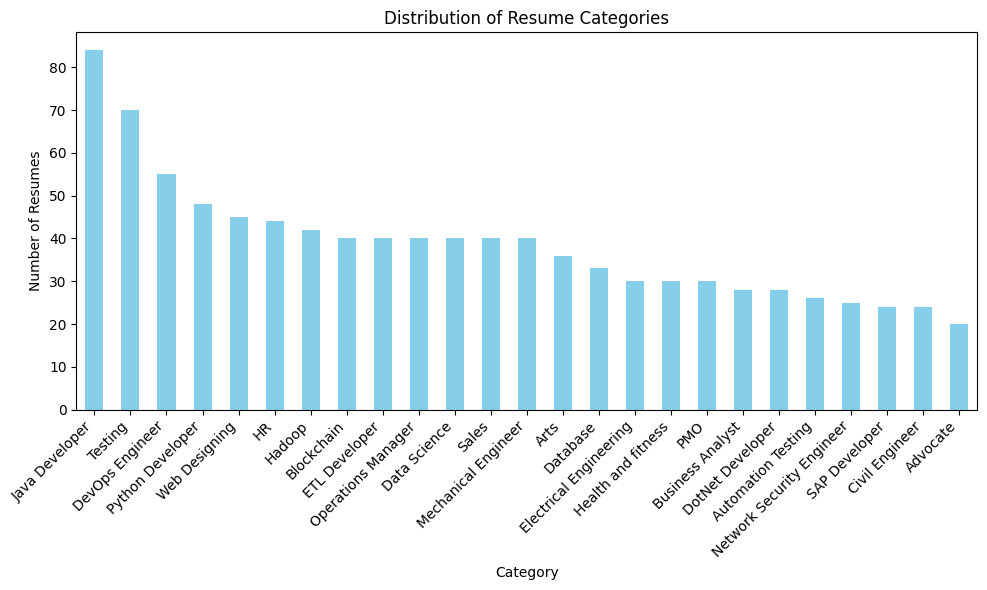

In [38]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Resume Categories')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
def clean_text(text):
    if text is None:
        return ''
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

df['cleaned_resume'] = df['Resume'].apply(clean_text)

In [6]:
def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = " ".join([page.extract_text() for page in pdf_reader.pages if page.extract_text()])
    return text

def extract_key_roles_and_experience(text):
    doc = nlp(text)
    key_roles = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "WORK_OF_ART"]]

    experience_pattern = r"(\d+)\+?\s?(years?|yrs?)\s?(of\s?)?(experience)?"
    experience_matches = re.findall(experience_pattern, text, re.IGNORECASE)

    total_experience = sum(int(match[0]) for match in experience_matches) if experience_matches else 0
    avg_experience = total_experience / len(experience_matches) if experience_matches else 0

    return key_roles, avg_experience

vectorizer = TfidfVectorizer(max_features=5000)
X = df['cleaned_resume']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "Naïve Bayes": MultinomialNB(),
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train_encoded)
    y_pred_encoded = model.predict(X_test_tfidf)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))






Logistic Regression Performance:
Accuracy: 0.9948
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


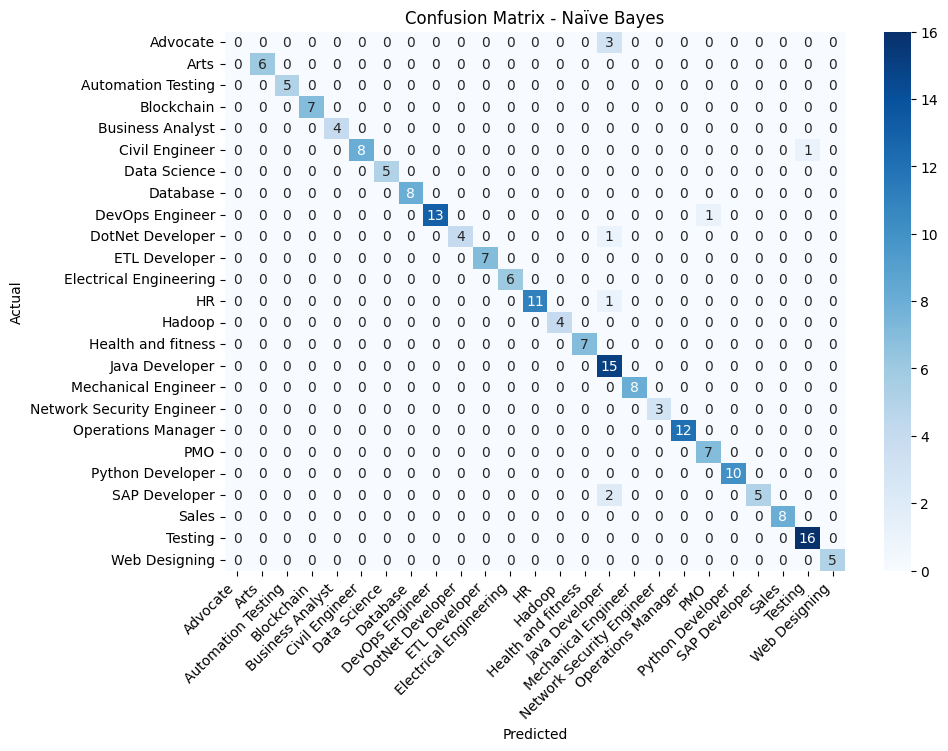

In [8]:
    cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()


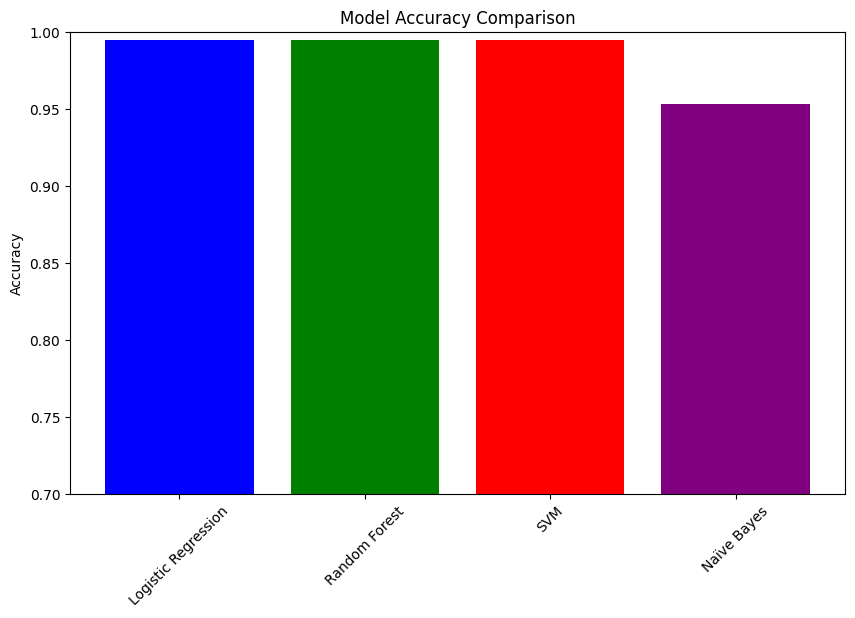

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [10]:
import joblib

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
final_model = models["Logistic Regression"]
joblib.dump(final_model, "resume_screening_model.pkl")

['resume_screening_model.pkl']

In [36]:
import joblib
import re
import spacy
import PyPDF2
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
import spacy
nlp = spacy.load("en_core_web_md")

nlp = spacy.load("en_core_web_md")

with open('resume_screening_model.pkl', 'rb') as file:
    model = joblib.load(file)
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = joblib.load(file)
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = joblib.load(file)

def extract_text_from_pdf(cv_path):
    """Extract text from PDF."""
    try:
        with open(cv_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = " ".join([page.extract_text() for page in pdf_reader.pages if page.extract_text()])
        return text
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return ""

def clean_text(text):
    """Preprocess text by removing special characters, extra spaces, and stopwords."""
    if text is None:
        return ''
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    return text

def predict_resume_category(cv_path):
    """Predicts the category of a resume."""
    cv_text = extract_text_from_pdf(cv_path)
    if not cv_text.strip():
        return "Error: Resume text is empty or unreadable."

    cv_text_clean = clean_text(cv_text)
    cv_vec = vectorizer.transform([cv_text_clean])

    predicted_category_index = model.predict(cv_vec)[0]
    predicted_category_label = label_encoder.inverse_transform([predicted_category_index])[0]

    return predicted_category_label

def evaluate_cv(job_desc, cv_text):
    """Evaluate similarity between job description and CV using TF-IDF and word embeddings."""
    job_desc_clean = clean_text(job_desc)
    cv_text_clean = clean_text(cv_text)

    job_desc_vec = vectorizer.transform([job_desc_clean])
    cv_vec = vectorizer.transform([cv_text_clean])

    tfidf_similarity = cosine_similarity(job_desc_vec, cv_vec)[0][0]

    job_desc_doc = nlp(job_desc_clean)
    cv_text_doc = nlp(cv_text_clean)

    semantic_similarity = job_desc_doc.similarity(cv_text_doc)

    final_score = (tfidf_similarity + semantic_similarity) / 2

    return {"tfidf_score": tfidf_similarity, "semantic_score": semantic_similarity, "final_score": final_score}

def extract_top_roles(cv_text, top_n=3):
    """Extracts top job roles dynamically based on occurrence in the CV."""
    doc = nlp(cv_text)
    job_titles = []

    for ent in doc.ents:
        if ent.label_ in ["ORG", "PERSON", "GPE"]:  #
            continue
        job_titles.append(ent.text)

    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in STOP_WORDS and len(chunk.text) > 2:
            job_titles.append(chunk.text)

    role_counts = Counter(job_titles)
    top_roles = [role for role, _ in role_counts.most_common(top_n)]
    return top_roles

def extract_experience(text):
    """Extracts years of experience dynamically from a resume."""
    experience_pattern = r"(?i)(\d{1,2}(?:\.\d{1,2})?)\s*(years?|yrs?|months?)\s*(of\s?)?(experience|exp)?"
    experience_matches = re.finditer(experience_pattern, text)

    total_experience_months = 0
    for match in experience_matches:
        num_years = float(match.group(1))
        duration_type = match.group(2).lower()
        if "year" in duration_type:
            total_experience_months += int(num_years * 12)
        elif "month" in duration_type:
            total_experience_months += int(num_years)

    avg_experience_years = total_experience_months / 12 if total_experience_months > 0 else 0

    return avg_experience_years

job_description = """We are looking for a passionate Data Scientist with experience in machine learning, deep learning, and data analysis. The ideal candidate should be proficient in Python, TensorFlow, and have strong analytical skills."""
cv_path = "Rehima_Resume1.pdf"

cv_text = extract_text_from_pdf(cv_path)

job_category = predict_resume_category(cv_path)

key_roles= extract_top_roles(cv_text)
avg_experience = extract_experience(cv_text)

similarity_score = evaluate_cv(job_description, cv_text)

print("\nPredicted Resume Category:", job_category)
print("Top 3 Key Roles Identified:", key_roles)
print("Average Years of Experience:", avg_experience)
print("Similarity Score:", similarity_score['final_score'])

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Predicted Resume Category: Data Science
Top 3 Key Roles Identified: ['TensorFlow', 'Matplotlib', 'CSS']
Average Years of Experience: 0.5
Similarity Score: 0.595575605617005
